<a href="https://colab.research.google.com/github/WuiiiGithub/Learn/blob/main/MachineLearning/LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction using Data Analysis Instead

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
tnames = data.target_names
data = pd.concat([pd.DataFrame(data.data, columns=[name[:-5] for name in data.feature_names]), pd.DataFrame(data.target, columns=['type'])], axis=1).sample(frac=1.)
testData = data.iloc[75:,:]
data = data.iloc[:75,:]
data

,sepal length,sepal width,petal length,petal width,type
77,6.7,3.0,5.0,1.7,1
84,5.4,3.0,4.5,1.5,1
96,5.7,2.9,4.2,1.3,1
36,5.5,3.5,1.3,0.2,0
137,6.4,3.1,5.5,1.8,2
...,...,...,...,...,...
44,5.1,3.8,1.9,0.4,0
92,5.8,2.6,4.0,1.2,1
141,6.9,3.1,5.1,2.3,2
94,5.6,2.7,4.2,1.3,1


### Observations during Plotting


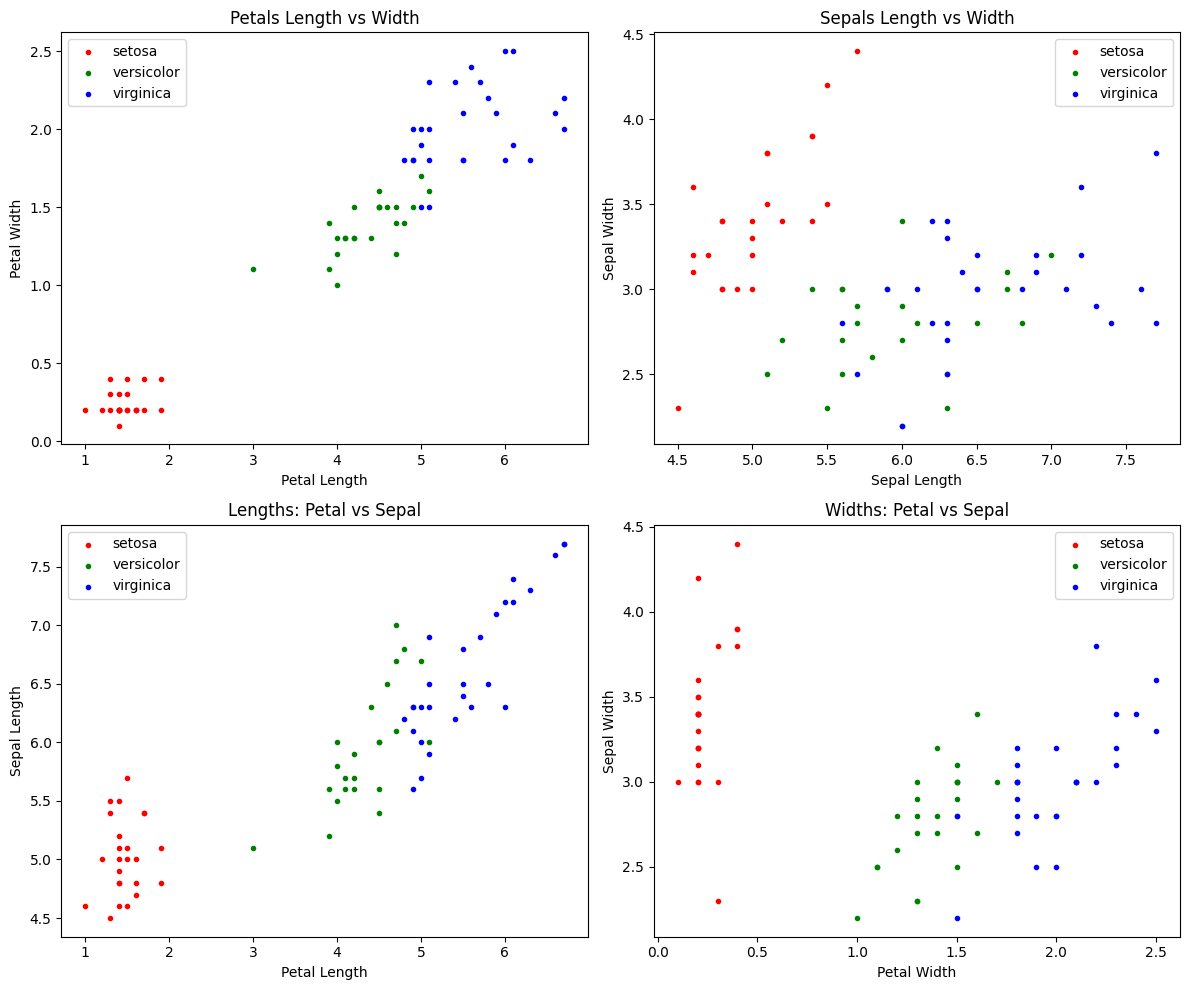

In [3]:
clr = ['red', 'green', 'blue']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].set_title("Petals Length vs Width")
axes[0, 0].set_xlabel('Petal Length')
axes[0, 0].set_ylabel('Petal Width')
for c in range(3):
    axes[0, 0].scatter(
        data[data.type == c]['petal length'],
        data[data.type == c]['petal width'],
        marker='.',
        color=clr[c],
        label=tnames[c]
    )
axes[0, 0].legend()

axes[0, 1].set_title("Sepals Length vs Width")
axes[0, 1].set_xlabel('Sepal Length')
axes[0, 1].set_ylabel('Sepal Width')
for c in range(3):
    axes[0, 1].scatter(
        data[data.type == c]['sepal length'],
        data[data.type == c]['sepal width'],
        marker='.',
        color=clr[c]
    )
axes[0, 1].legend(tnames)

axes[1, 0].set_title("Lengths: Petal vs Sepal")
axes[1, 0].set_xlabel('Petal Length')
axes[1, 0].set_ylabel('Sepal Length')
for c in range(3):
    axes[1, 0].scatter(
        data[data.type == c]['petal length'],
        data[data.type == c]['sepal length'],
        marker='.',
        color=clr[c]
    )
axes[1, 0].legend(tnames)

axes[1, 1].set_title("Widths: Petal vs Sepal")
axes[1, 1].set_xlabel('Petal Width')
axes[1, 1].set_ylabel('Sepal Width')
for c in range(3):
    axes[1, 1].scatter(
        data[data.type == c]['petal width'],
        data[data.type == c]['sepal width'],
        marker='.',
        color=clr[c]
    )
axes[1, 1].legend(tnames)

plt.tight_layout()
plt.show()

#### 1st Graph: Petals length vs Width

*Red Points:*

`x btw 0 to 2.5`

*Green Points:*

`x btw 2.5 to 5.2 && y bellow 1.7`


*Blue Points:*

if not blue and not green 😜

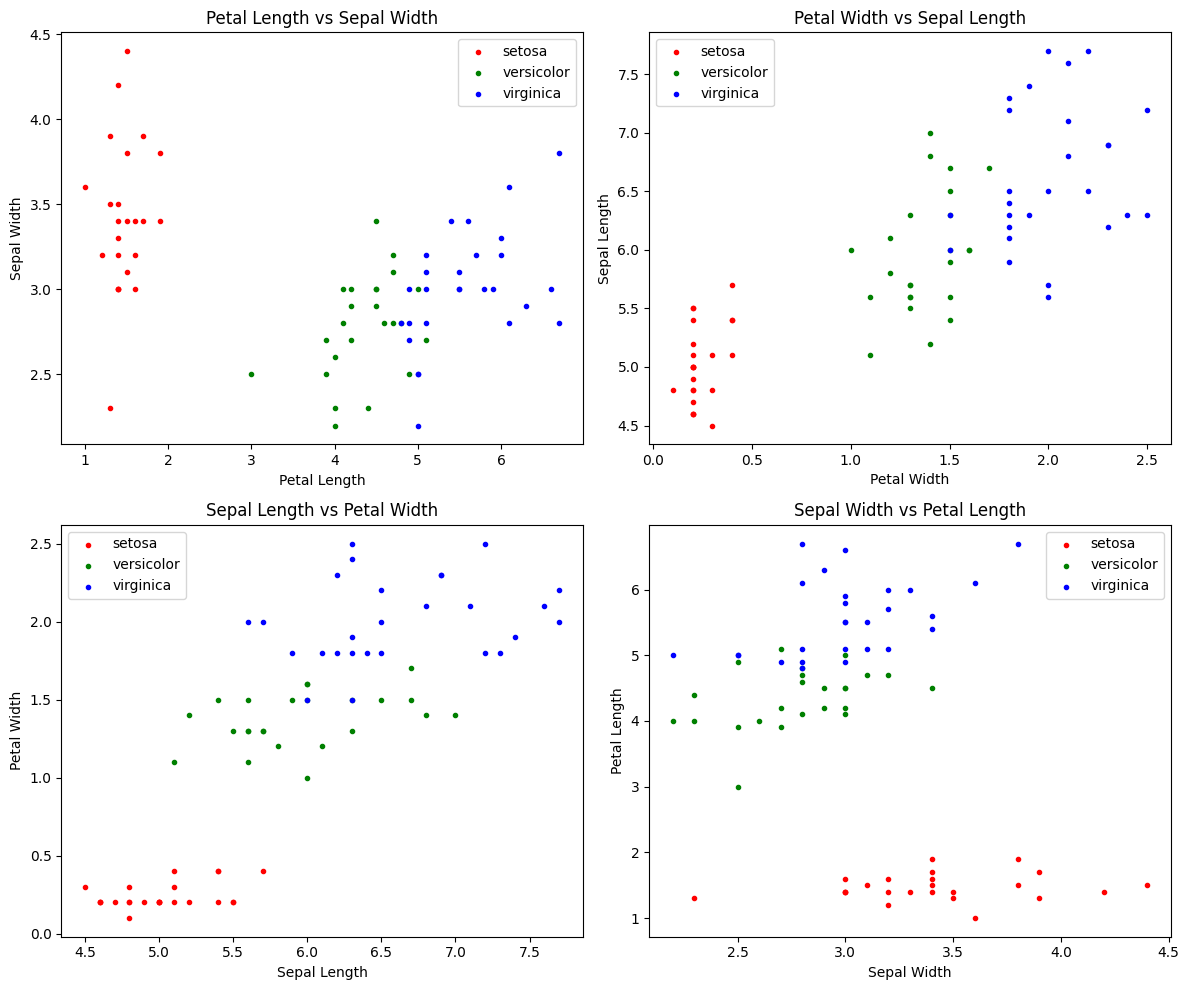

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].set_title("Petal Length vs Sepal Width")
axes[0, 0].set_xlabel('Petal Length')
axes[0, 0].set_ylabel('Sepal Width')
for c in range(3):
    axes[0, 0].scatter(
        data[data.type == c]['petal length'],
        data[data.type == c]['sepal width'],
        marker='.',
        color=clr[c],
        label=tnames[c]
    )
axes[0, 0].legend()

axes[0, 1].set_title("Petal Width vs Sepal Length")
axes[0, 1].set_xlabel('Petal Width')
axes[0, 1].set_ylabel('Sepal Length')
for c in range(3):
    axes[0, 1].scatter(
        data[data.type == c]['petal width'],
        data[data.type == c]['sepal length'],
        marker='.',
        color=clr[c]
    )
axes[0, 1].legend(tnames)

axes[1, 0].set_title("Sepal Length vs Petal Width")
axes[1, 0].set_xlabel('Sepal Length')
axes[1, 0].set_ylabel('Petal Width')
for c in range(3):
    axes[1, 0].scatter(
        data[data.type == c]['sepal length'],
        data[data.type == c]['petal width'],
        marker='.',
        color=clr[c]
    )
axes[1, 0].legend(tnames)

axes[1, 1].set_title("Sepal Width vs Petal Length")
axes[1, 1].set_xlabel('Sepal Width')
axes[1, 1].set_ylabel('Petal Length')
for c in range(3):
    axes[1, 1].scatter(
        data[data.type == c]['sepal width'],
        data[data.type == c]['petal length'],
        marker='.',
        color=clr[c]
    )
axes[1, 1].legend(tnames)

plt.tight_layout()
plt.show()


#### 6th Graph Petal Width vs Sepal Length

Red Points:

`x<0.8`

Green Points:

`x>0.8 & x<1.7`

Blue Points:

`Others`

<br>

#### 6th Graph Sepal Length vs Petal Width
Red Points:

`y<.75`

Green Points:

`0.75<y<1.6 && x<7`

Blue Points:
`Others`


In [5]:
def predictor1(X):
    return np.where(X['petal length'] < 2.5, 0,
                    np.where((X['petal length'] < 5.2) & (X['petal width'] < 1.7), 1, 2))

def predictor2(X):
    return np.where(X['petal width'] < 0.75, 0,
                    np.where(X['petal width'] < 1.7, 1, 2))

def predictor3(X):
    return np.where(
        X['petal width'] < 0.75, 0,
        np.where((X['petal width'] > 0.75) & (X['petal width'] < 1.6) & (X['sepal length'] < 7), 1,
        2
    ))

In [6]:
X = data.drop(columns = ['type'])
y = data['type']

y_pred1 = predictor1(X)
y_pred2 = predictor2(X)
y_pred3 = predictor3(X)

print("Predictor 1: Petals Length vs Width\n==========\n")
print(classification_report(y, y_pred1))
print("\n\nPredictor 2: Petal Width vs Sepal Length\n==========\n")
print(classification_report(y, y_pred2))
print("\n\nPredictor 3: Sepal Length vs Petal Width\n==========\n")
print(classification_report(y, y_pred3))

Predictor 1: Petals Length vs Width

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.92      0.96      0.94        24
           2       0.96      0.93      0.94        27

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



Predictor 2: Petal Width vs Sepal Length

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.92      0.96      0.94        24
           2       0.96      0.93      0.94        27

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



Predictor 3: Sepal Length vs Petal Width

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
    

# Multi Linear Regression

## Using Sklearn

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

In [8]:
data = load_iris()
X = data['data']
y = data['target']
fnames = data['feature_names']
tnames = data['target_names']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42, shuffle=True)

In [10]:
model = LinearRegression(fit_intercept=True, n_jobs=5)
model.fit(X_train, y_train)
y_pred = np.rint(np.abs(model.predict(X_test))).astype(int)
print(classification_report(y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



## Matrix Single - Shot Compute

In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [12]:
iris = datasets.load_iris()
X = iris.data
X = np.c_[np.ones(X.shape[0]), X]
y = iris.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42, shuffle=True)

W = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred = np.rint(X_test@W).astype(int)

print(classification_report(y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



## Self Iterative Approach

In [14]:
import numpy as np
import pandas as pd

In [21]:
class LinearModel:
    def __init__(self, isClassifier: bool, alpha: float=1):
        self.alpha = alpha
        self.isClassifier = isClassifier

    def train(self, X, y):
        step = 0
        self.w = np.random.rand(X.shape[1])
        self.b = np.random.rand(1)[0]
        for xData, yData in zip(X, y):
            step+=1
            yPred = np.dot(xData, self.w) + self.b
            error = yData - yPred
            self.w = self.w + self.alpha*(xData.T*error)/len(X)
            self.b = self.b + self.alpha*error/len(X)
            print(f"Step {step}/{X.shape[1]} || Error: {error}")

        return self.w, self.b

    def test(self, X, y):
        yPreds = []
        for xData, yData in zip(X, y):
            yPred = np.dot(xData, self.w) + self.b
            yPreds.append(yPred)

        yPreds = np.rint(yPreds).astype(int)

        print("Model Performance: \n=====")

        if self.isClassifier:
            print()
            accuracy = sum(y==yPreds)/len(X)
            print("Accuracy:", accuracy)

        else:
            print("Mean Absolute Error (MAE):", sum(np.abs(y-yPreds)))
            print("Mean Squared Error (MSE):", sum(y-yPreds)**2)

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Datasets/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
df.species.replace({
    'setosa': 1,
    'versicolor': 2,
    'virginica': 3
}, inplace=True)
df

<ipython-input-23-8bc2c6f1d5d0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.species.replace({
<ipython-input-23-8bc2c6f1d5d0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.species.replace({


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [24]:
df = df.sample(150)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [29]:
loc = 50
linModel = LinearModel(isClassifier=True, alpha=1)
linModel.train(X.iloc[:loc,:].values, y.iloc[:loc].values)

Step 1/4 || Error: -6.411136659094669
Step 2/4 || Error: -2.508078526903263
Step 3/4 || Error: -0.8611977739675938
Step 4/4 || Error: 1.1444033982443464
Step 5/4 || Error: 0.05994508344390104
Step 6/4 || Error: -0.4740909526680892
Step 7/4 || Error: -0.02468170957038307
Step 8/4 || Error: 0.6949857406866777
Step 9/4 || Error: -0.0536416620554907
Step 10/4 || Error: -0.5206572880993758
Step 11/4 || Error: 0.3624801271800453
Step 12/4 || Error: 0.11343425995789591
Step 13/4 || Error: 0.1403843832018694
Step 14/4 || Error: -0.4893217535451777
Step 15/4 || Error: 0.2034537061555204
Step 16/4 || Error: -0.2961667647866415
Step 17/4 || Error: 0.5010033715102759
Step 18/4 || Error: 0.03505659151558782
Step 19/4 || Error: -0.5310878717612546
Step 20/4 || Error: 0.2855901078076448
Step 21/4 || Error: 0.6524101386791825
Step 22/4 || Error: -0.5188591442382879
Step 23/4 || Error: -0.36725844935054797
Step 24/4 || Error: 0.6351188749219316
Step 25/4 || Error: -0.5274186071160689
Step 26/4 || Error

(array([ 0.0151843 , -0.03869523,  0.19769923,  0.55156506]),
 0.584293328569241)

In [30]:
linModel.test(X.iloc[loc:,:].values, y.iloc[loc:].values)

Model Performance: 
=====

Accuracy: 0.97
